QUESTION 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
#ive randomly created a dataset

np.random.seed(42)

# number of samples
n_samples = 200

# input features (i have taken 2 features)
X = np.random.rand(n_samples, 2)

# true weights
true_w = np.array([3.0, -2.0])
true_b = 5.0

#  adding noise
noise = np.random.randn(n_samples) * 0.5

# target variable
y = X @ true_w + true_b + noise


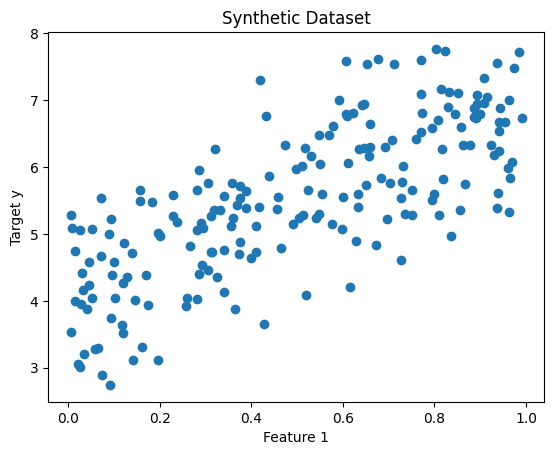

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], y)
plt.xlabel("Feature 1")
plt.ylabel("Target y")
plt.title("Synthetic Dataset")
plt.show()


In [ ]:
class StandardScalerManual:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        # mean and standard deviation for each feature (column-wise)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

        # avoid division by zero
        self.std[self.std == 0] = 1.0

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [ ]:
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initializing the parameters
        self.w = np.zeros(n_features)
        self.b = 0.0

        for _ in range(self.epochs):
            # prediction
            y_pred = X @ self.w + self.b

            # error calculation
            error = y_pred - y

            # loss calculation
            loss = np.mean(error ** 2) + self.l2_lambda * np.sum(self.w ** 2)
            self.loss_history.append(loss)

            # gradients
            dw = (2 / n_samples) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (2 / n_samples) * np.sum(error)

            # update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b



In [7]:
# Standardizing the features
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# Training the  model
model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

# storing the predictions
y_pred = model.predict(X_scaled)


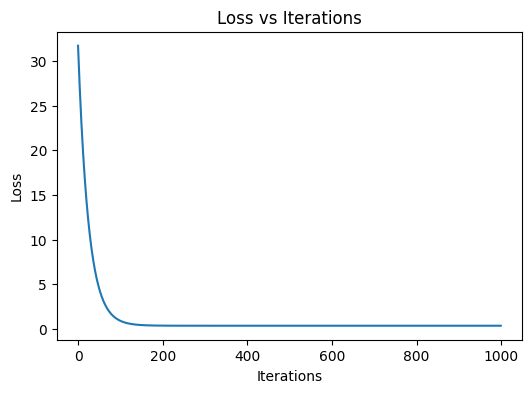

In [8]:
plt.figure(figsize=(6,4))
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()


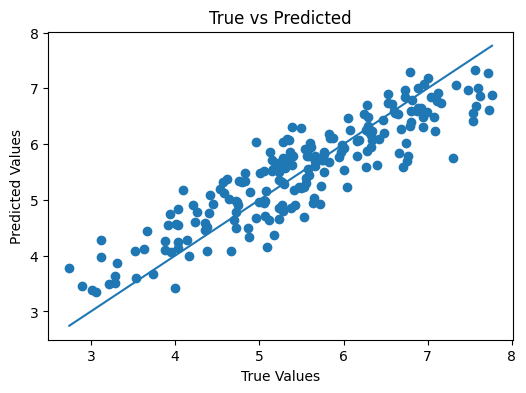

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.show()


QUESTION 2

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [11]:
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initializing weights
        self.w = np.zeros(n_features)
        self.b = 0.0

        for _ in range(self.epochs):
            # applying linear combination
            z = X @ self.w + self.b

            # sigmoid function
            y_pred = sigmoid(z)

            # avoiding log(0)
            eps = 1e-8

            # binary cross entropy and  L2
            loss = -np.mean(
                y * np.log(y_pred + eps) +
                (1 - y) * np.log(1 - y_pred + eps)
            ) + self.l2_lambda * np.sum(self.w ** 2)

            self.loss_history.append(loss)


            error = y_pred - y
            dw = (1 / n_samples) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (1 / n_samples) * np.sum(error)

            # updating the coefficients
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        z = X @ self.w + self.b
        return sigmoid(z)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


In [14]:
np.random.seed(42)

n_samples = 200
X = np.random.randn(n_samples, 2)

true_w = np.array([2.0, -3.0])
true_b = 0.5

logits = X @ true_w + true_b
probs = sigmoid(logits)

y = (probs >= 0.5).astype(int)


In [15]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)


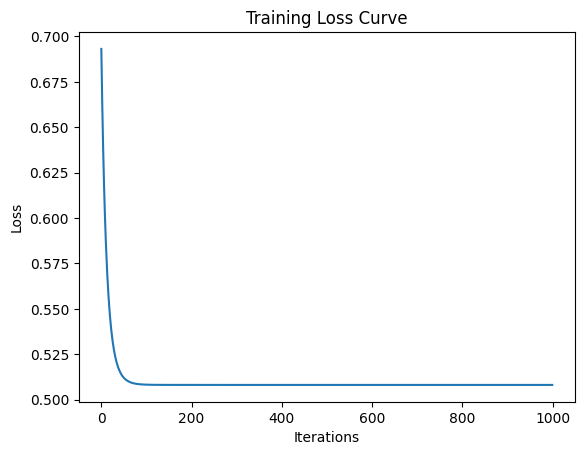

In [16]:
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


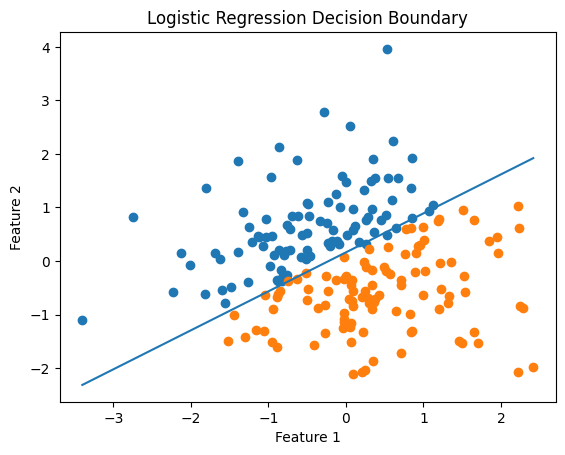

In [18]:
# i haveplotted the graph of best fit line dividing the dataset in two parts
def decision_boundary(x, model):
    w1, w2 = model.w
    b = model.b
    return -(w1 * x + b) / w2
x_vals = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)
y_vals = decision_boundary(x_vals, model)

plt.scatter(X_scaled[y == 0][:, 0], X_scaled[y == 0][:, 1])
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1])

plt.plot(x_vals, y_vals)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()


In [17]:
y_pred = model.predict(X_scaled)
accuracy = np.mean(y_pred == y)

print("Final Accuracy:", accuracy)


Final Accuracy: 0.98


QUESTION 3

In [ ]:


def kmeans_matrix(M, k, max_iters=100):
    n, m = M.shape

    # flattening matrix values
    values = M.flatten()

    # randomly initializing centroids from values
    centroids = np.random.choice(values, k, replace=False)

    for _ in range(max_iters):
        # assignment step
        labels = np.zeros(values.shape[0], dtype=int)

        for i, val in enumerate(values):
            distances = np.abs(val - centroids)
            labels[i] = np.argmin(distances)

        # update the data
        new_centroids = np.zeros_like(centroids)

        for cluster_id in range(k):
            cluster_vals = values[labels == cluster_id]

            if len(cluster_vals) > 0:
                new_centroids[cluster_id] = np.mean(cluster_vals)
            else:
                # reinitialize empty cluster
                new_centroids[cluster_id] = np.random.choice(values)

        # convergence check
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # reshaping labels back to matrix shape
    assignment_table = labels.reshape(n, m)

    
    cookbook = {i: [] for i in range(k)}
    for i in range(n):
        for j in range(m):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    return assignment_table, cookbook, centroids


In [20]:
np.random.seed(0)

M = np.random.rand(5, 5)
k = 3

assignment_table, cookbook, centroids = kmeans_matrix(M, k)

print("Matrix:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)
print("\nCookbook:\n", cookbook)


Matrix:
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]]

Assignment Table:
 [[1 0 1 1 1]
 [1 1 0 0 1]
 [0 1 1 0 2]
 [2 2 0 0 0]
 [0 0 1 0 2]]

Centroids:
 [0.84791288 0.51454565 0.07416455]

Cookbook:
 {0: [(0, 1), (1, 2), (1, 3), (2, 0), (2, 3), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 3)], 1: [(0, 0), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 4), (2, 1), (2, 2), (4, 2)], 2: [(2, 4), (3, 0), (3, 1), (4, 4)]}


BONUS

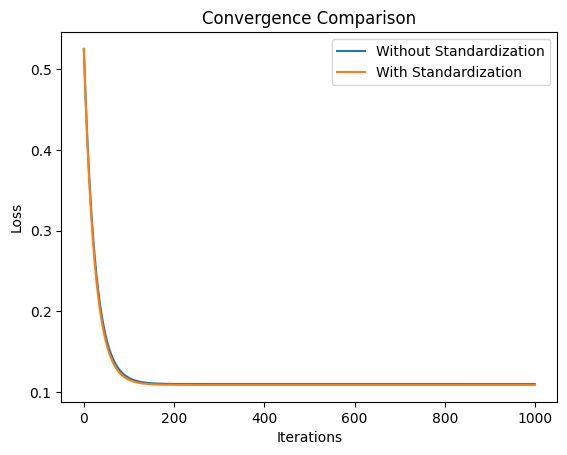

In [28]:
model_raw = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model_raw.fit(X, y)

plt.plot(model_raw.loss_history, label="Without Standardization")

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model_scaled = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model_scaled.fit(X_scaled, y)

plt.plot(model_scaled.loss_history, label="With Standardization")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Convergence Comparison")
plt.legend()
plt.show()


BONUS 2

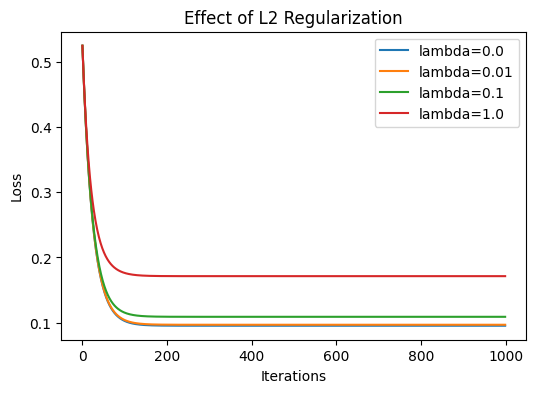

In [29]:
lambdas = [0.0, 0.01, 0.1, 1.0]
models = []

for lam in lambdas:
    model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=lam)
    model.fit(X_scaled, y)
    models.append(model)
plt.figure(figsize=(6,4))

for lam, model in zip(lambdas, models):
    plt.plot(model.loss_history, label=f"lambda={lam}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Effect of L2 Regularization")
plt.legend()
plt.show()
